## Testing Accuracy of Off-the-shelf Implementation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
from surprise import SVDpp
from surprise import Dataset
from surprise.model_selection import KFold
from surprise import accuracy
import pandas as pd
from surprise import NormalPredictor
from surprise import Reader

In [2]:
df = pd.read_csv('./data/data_parsed.txt', delimiter="\t")

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(df.iloc[:,:], reader)

In [3]:
kf = KFold(n_splits=10)
trainset, testset = kf.split(data).__next__()

# train and test algorithm.
algo = SVDpp()
algo.fit(trainset)
predictions = algo.test(testset)

# Compute and print Root Mean Squared Error
accuracy.rmse(predictions, verbose=True) / 2

RMSE: 0.9267


0.4633725069696564

## Training on Full Dataset

In [4]:
trainset = data.build_full_trainset()
algo = SVDpp()
algo.fit(trainset)

In [5]:
# OTS means off the shelf
U = algo.pu
V = algo.qi

In [6]:
A, Sigma, Bt = svd(V.transpose())
V_tilde = np.matmul(A[:,:2].transpose(), V.transpose())
U_tilde = np.matmul(A[:,:2].transpose(), U.transpose())
V_x = V_tilde[0]
V_y = V_tilde[1]
U_x = U_tilde[0]
U_y = U_tilde[1]

## Visualizations

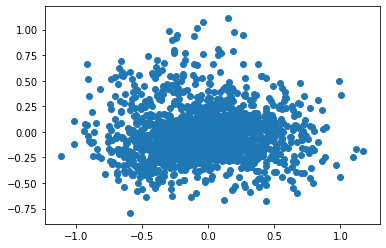

In [7]:
plt.scatter(V_x, V_y)
plt.savefig('Shelf_movie_features.png', bbox_inches='tight')



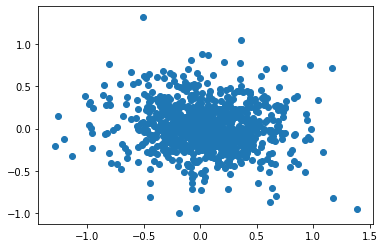

In [8]:
plt.scatter(U_x, U_y)
plt.savefig('Shelf_user_features.png', bbox_inches='tight')



In [9]:
# Get some basic counts for later use
ratings = np.loadtxt('./data/data.txt').astype(int)
n_movies = max(ratings[:,1]).astype(int) # movies

num_ratings = [0 for i in range(n_movies)]
avg_ratings = [0 for i in range(n_movies)]

for rating in ratings:
    movie_ind = rating[1] - 1
    num_ratings[movie_ind] += 1
    avg_ratings[movie_ind] += rating[2]
    
for i in range(n_movies):
    avg_ratings[i] /= num_ratings[i]

In [11]:
N = 1664

In [12]:
most_rated = np.argpartition(num_ratings, -10)[-10:]
most_rated.sort()

n_parsed_movies = N
a = np.arange(n_parsed_movies)
exclude = np.setdiff1d(a, most_rated)

most_popular_x = np.delete(V_x, exclude)
most_popular_y = np.delete(V_y, exclude)

In [13]:
choice_movies = [1, 11, 140, 167, 194, 227, 233, 269, 418, 464]

In [14]:
a = np.arange(n_parsed_movies)
exclude = np.setdiff1d(a, choice_movies)

choice_movies_x = np.delete(V_x, exclude)
choice_movies_y = np.delete(V_y, exclude)

In [15]:
high_rated = np.argpartition(avg_ratings, -10)[-10:]

In [16]:
a = np.arange(n_parsed_movies)
exclude = np.setdiff1d(a, high_rated)

high_rated_x = np.delete(V_x, exclude)
high_rated_y = np.delete(V_y, exclude)

In [17]:
from collections import Counter
# Loading the movie data
movie_data = np.genfromtxt('./data/movies.txt', dtype=None, delimiter='\t', encoding='utf8')
movie_titles = [movie[1] for movie in movie_data]
movie_dict = Counter(movie_titles)
movie_ids = {}

for movie in movie_data:
    movie_id = movie[0]
    movie_ids[movie_id] = movie[1]

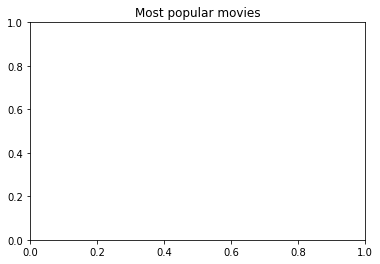

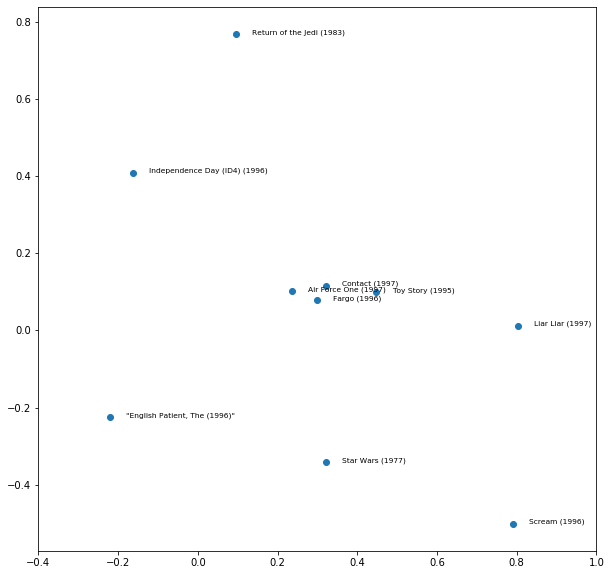

In [21]:
titles = []
for i,most in enumerate(most_rated):
    titles.append(movie_ids[most+1])

plt.title("Most popular movies")
plt.figure(figsize=(10,10))
axes = plt.gca()
axes.set_xlim([-0.4,1])
# axes.set_ylim([-0.75,0.75])
plt.scatter(most_popular_x, most_popular_y)
for i, txt in enumerate(titles):
    plt.annotate(txt, (most_popular_x[i]+.04, most_popular_y[i]), fontsize=7.5)
plt.savefig('Shelf_popular_features.png', bbox_inches='tight')
plt.show()

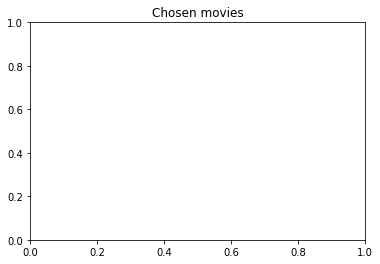

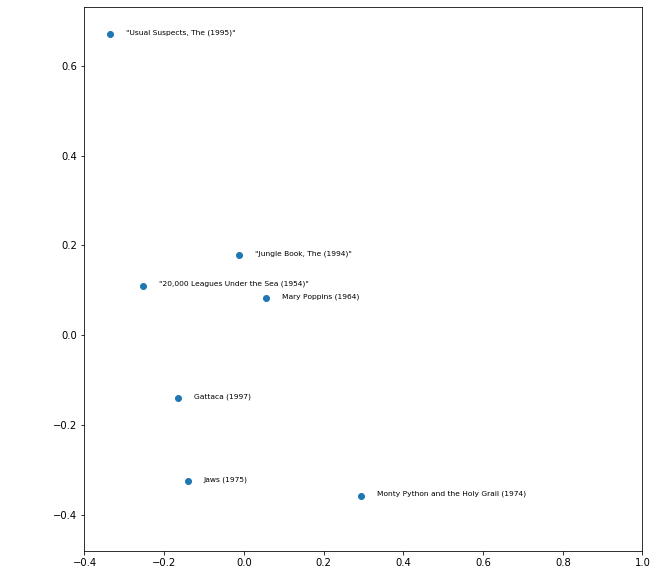

In [19]:
titles = []
for i,most in enumerate(choice_movies):
    titles.append(movie_ids[most+1])

plt.title("Chosen movies")
plt.figure(figsize=(10,10))
axes = plt.gca()
axes.set_xlim([-0.4,1.0])
# axes.set_ylim([-0.75,0.75])
plt.scatter(choice_movies_x, choice_movies_y)
for i, txt in enumerate(titles):
    plt.annotate(txt, (choice_movies_x[i]+.04, choice_movies_y[i]), fontsize=7.5)
plt.savefig('Shelf_chosen_features.png', bbox_inches='tight')
plt.show()

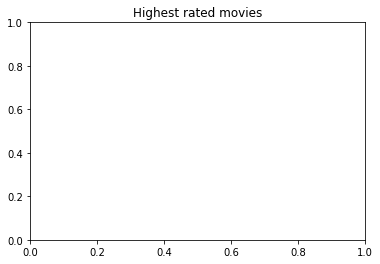

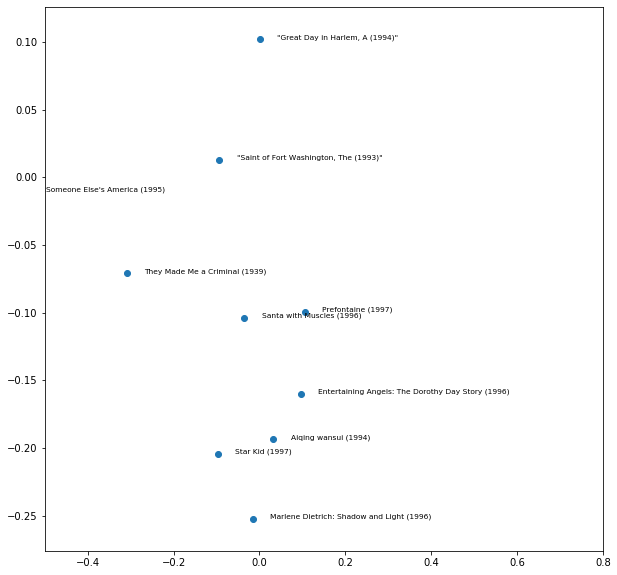

In [20]:
titles = []
for i,most in enumerate(high_rated):
    titles.append(movie_ids[most+1])

plt.title("Highest rated movies")
plt.figure(figsize=(10,10))
axes = plt.gca()
axes.set_xlim([-0.5,0.8])
# axes.set_ylim([-0.75,0.75])
plt.scatter(high_rated_x, high_rated_y)
for i, txt in enumerate(titles):
    plt.annotate(txt, (high_rated_x[i]+.04, high_rated_y[i]), fontsize=7.5)
plt.savefig('Shelf_highestrated_features.png', bbox_inches='tight')
plt.show()